# Inteligencia Artificial Aplicada al Análisis de Datos Biológicos

__Análisis de datos de expresión con algoritmos no supervisados__

_MeIA_

`2025`

# Aprendizaje supervisado

## Identification of promoters


![texto del vínculo](https://www.researchgate.net/profile/Chungpin-Liao/publication/339997649/figure/fig2/AS:870262731968513@1584498212473/llustrative-positioning-of-core-promoter-for-DNA-transcription-A-typical-example-is-also.png)



In [1]:
# Import libraries
import sys
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the ICU Molecular Biology (Promoter Gene Sequences) Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"

In [3]:
names = ["Class", "id", "Sequence"]

In [4]:
data = pd.read_csv(url, names = names)

In [5]:
data

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [6]:
#Building our Dataset by creating a custom Pandas Dataframe
# Each column in a Dataframe is called a Series.
classes = data.loc[:,"Class"]

In [7]:
print(classes)

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object


In [8]:
# generate list of DNA sequence
sequences = list(data.loc[: , "Sequence"])
dataset = {}

# loop hrough sequences and split into individual nucleotides
for i, seq in enumerate(sequences):

  # split into nucleotides, remove ta characters
  nucleotides = list(seq)
  nucleotides = [x for x in nucleotides if x != '\t']

  # append class assignment
  nucleotides.append(classes[i])

  # add to dataset
  dataset[i] = nucleotides

print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [9]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)

# print the dataframe using tabulate packages in a tab-separated format
dframe

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a
5,g,t,a,t,a,c,g,a,t,a,...,t,g,c,g,c,a,c,c,c,t
6,c,c,g,g,a,a,g,c,a,a,...,a,g,c,t,a,t,t,t,c,t
7,a,c,a,a,t,a,t,a,a,t,...,g,a,g,g,t,g,c,a,t,a
8,a,t,g,t,t,g,g,a,t,t,...,a,c,a,t,g,g,a,c,c,a
9,t,g,a,g,a,g,g,a,a,t,...,c,t,a,a,t,c,a,g,a,t


In [10]:
# transpose the dataframe
df = dframe.transpose()

# print the dataframe using tabulate packages in a tab-separated format
df.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [11]:
# rename the last column as class

df.rename(columns = {57 : "Class"}, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [12]:
# looks good. Let's start to familiarize ourselves with the dataset so we can pick the most suitable

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [13]:
# describe  doesn't tell us enough information since the attributes are text. Let's record alue counts for each sequence

series = []

for name in df.columns:
  series.append(df[name].value_counts())

info = pd.DataFrame(series)
details = info.transpose()
details

,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
t,38.0,26.0,27.0,26.0,22.0,24.0,30.0,32.0,32.0,28.0,...,21.0,22.0,23.0,33.0,35.0,30.0,23.0,29.0,34.0,NaN
c,27.0,22.0,21.0,30.0,19.0,18.0,21.0,20.0,22.0,22.0,...,36.0,42.0,31.0,32.0,21.0,32.0,29.0,29.0,17.0,NaN
a,26.0,34.0,30.0,22.0,36.0,42.0,38.0,34.0,33.0,36.0,...,23.0,24.0,28.0,27.0,25.0,22.0,26.0,24.0,27.0,NaN
g,15.0,24.0,28.0,28.0,29.0,22.0,17.0,20.0,19.0,20.0,...,26.0,18.0,24.0,14.0,25.0,22.0,28.0,24.0,28.0,NaN
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0


In [14]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch it to numerical data.
# This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [15]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,True,False,True


linkcode
Modeling
Splitting the dataset into training test and test set

In [16]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'],axis=1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

## Árboles de decisión y bosques aleatorios

Los árboles de decisión y los bosques aleatorios son algoritmos de aprendizaje supervisado que se utilizan para problemas de clasificación y regresión.

El algoritmo de Random forest es esencialmente un conjunto de árboles de decisión.

Un árbol de decisión se basa en todo el conjunto de datos, mientras que random forest selecciona observaciones y características para crear varios árboles de decisión y luego promedia los resultados.

Un árbol de decisión pronostica el valor de una variable objetivo aprendiendo reglas de decisión simples mediante el uso de un modelo jerárquico de toma de decisiones similar a un árbol.

<img src="../Imagen/tree1.png" width="700" height="auto"/>



Los árboles de decisión funcionan como un diagrama de flujo o una cadena de decisiones para lograr objetivos específicos.

El árbol consiste de nodos y ramas, los nodos son una prueba o condición y las ramas representan su resultado.

- Nodo raíz: sive como toda la población o la muestra que se divide en dos o más conjuntos diversos de grupos.

- Nodo de decisión: el nodo de decisión recibe su nombre cuando un subnodo se divide en más subnodos.

- Nodo hoja: son el resultado final de todas las decisiones encadenadas respectivas y, a menudo, se denominan nodos terminales.

El proceso de dividir un nodo en más subnodos se basa en una prueba llamada división.

<img src="../Imagen/disper.png" width="700" height="auto"/>

En la Figura, tenemos ciertos puntos de datos de dos grupos (azul y amarillo) y llevamos dos características X1 y X2 que describen estos puntos de datos.

El primer paso es encontrar la condición del nodo raíz. Para el nodo raíz, tenemos que crear una condición o una prueba mediante la cual podamos separar el máximo de puntos de datos de los grupos.

En consecuencia, en el paso uno, seleccionamos la condición "X2 > 20". Como podemos observar, los puntos de datos por encima y por debajo del valor “20” de la característica X2 separan a toda la población con impurezas mínimas, o específicamente, la proporción de grupos similares y el grupo no similar es alta (Figura abajo). El nodo raíz (RN) tiene dos ramas: la rama izquierda muestra la condición "Verdadera" y la rama derecha representa la condición "Falsa" (es decir, "Sí" y "No" respectivamente, según la condición del nodo raíz).

<img src="../Imagen/tree2.png" width="700" height="auto"/>

- La construcción de demasiados nodos de decisión aumenta la profundidad del árbol de decisión, lo que conduce a un sobreajuste del modelo. Por lo tanto, con datos del mundo real, tenemos que restringir la creación de nodos o límites de decisión y al mismo tiempo tolerar pequeñas impurezas en los nodos de hoja. Este proceso se llama poda de árboles.

Algunas de las principales ventajas de los árboles de decisión sobre otras formas de algoritmos de aprendizaje supervisado incluyen, entre otras:
1. Los árboles de decisión son sencillos de entender y visualmente representativos.
2. Se requiere poco o ningún procesamiento de datos.
3. Esto se puede aplicar tanto a datos numéricos y categóricos.

Sin embargo, como cualquier otro algoritmo de aprendizaje automático, los árboles de decisión tienen su propio conjunto de desventajas que incluyen:
1. Los árboles de decisión son propensos a sobreajustarse. Se utilizan métodos como la poda o la especificación del número mínimo de muestras para superar el problema del sobreajuste.
2. Dado que la mayoría de la decisiones se toman en nodos individuales, es posible que el árbol resultante no sea un árbol de decisión globalmente óptimo. Por lo tanto, el conjunto de datos se equilibra antes de ajustarlo al árbol de decisión.
3. Un solo árbol a veces es insuficiente para lograr resultados exitosos. Se aprovecha el poder de múltiples árboles de decisión para superar este inconveniente de los árboles de decisión, mediante el cual cada nodo del árbol de decisión trabaja en un subconjunto aleatorio de características para calcular el resultado. Este algoritmo, también conocido como algoritmo de random forests, combina la salida de árboles de decisión individuales para producir el resultado final.

### Random Forests

![picture](https://miro.medium.com/v2/resize:fit:720/format:webp/1*jE1Cb1Dc_p9WEOPMkC95WQ.png)

Es una colección de árboles de decisión. Un clasificador de random forests entrena varios árboles de decisión en pequeñas muestras del conjunto de datos de entrenamiento.

Estas pequeñas muestras se seleccionan aleatorimente con reemplazos, con lo que se construyen muchos árboles de decisión.

Esta técnica de elegir muestras pequeñas se llama muestreo bootstrap. El modelo de bosque aleatorio también se conoce como método de conjunto, ya que es una colección de varios árboles de decisión.

El resultado de la predicción se basa en el resultado acumulativo de todos los árboles, más específicamente, la decisión de la mayoría es el resultado.

Normalmente, los bosques aleatorios son más precisos y estables que los árboles de decisión única. La mayor precisión de los bosques aleatorios sobre los árboles de decisión puede deberse a dos razones principales:
1. A diferencia de los árboles de decisión, los bosques aleatorios no se podan, por lo que el espacio característico se divide en un mayor número de áreas más finas.
2. Cada árbol aleatorio aprende de una muestra aleatoria y cada nodo utiliza un conjunto aleatorio de características para dividirse y crear diversidad entre los árboles.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [18]:
# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [19]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

### Prediction and Evaluation of Random Forest Model

In [20]:
rfc_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[8 9]
 [4 6]]
              precision    recall  f1-score   support

       False       0.67      0.47      0.55        17
        True       0.40      0.60      0.48        10

    accuracy                           0.52        27
   macro avg       0.53      0.54      0.52        27
weighted avg       0.57      0.52      0.53        27



# Support vector machines (SVM)

Son una clase de algoritmos de aprendizaje automático supervisado y es uno de los más utilizados para tareas de clasificación.

Las máquinas de vectores de soporte son clasificadores lineales porque establecen límites de decisión lineales.

El objetivo de la máquina de vectores de soporte es encontrar un hiperplano o límite de decisión que se ajuste mejor y separe el espacio de n dimensiones en clases o grupos separados.

Cuando colocamos la nueva instancia en una SVM entrenada, clasifica el nuevo punto de datos en una de las categorías. El límite de decisión óptimo se conoce como hiperplano. El hiperplano es un límite de decisión plano con dimensiones N − 1 para un conjunto de datos de N dimensiones.

Para datos 2D, visualmente será una línea, y para datos 3D, se representará con un plano que separa dos grupos. Para aplicar máquinas de vectores de soporte, los datos deben ser clasificables linealmente, lo que significa que debe existir una línea o plano desde donde se puedan separar los grupos o clases.

<img src="../Imagen/svm.png" width="700" height="auto"/>


## Kernel Trick (Truco del núcleo)
SVM solo pueden clasificar datos linealmente separables, pero es posible que los conjuntos de datos del mundo real no siempre sean linealmente separables.

Hasta cierto punto, el uso de un margen suave puede ayudar a clasificar los datos linealmente, pero, incluso entonces, los datos ya deben poseer un límite discriminatorio lineal.

Para conjuntos de datos que no tienen ningún límite lineal único, se aplica el truco del núcleo.

Esto tiene como objetivo mapear los datos de baja dimensión a una dimensión superior donde sean linealmente separables.

Por lo tanto, la suposición aquí es que, si los datos de N dimensiones no son linealmente separables, entonces hay una dimensión mayor que N donde los puntos de datos son linealmente separables. Las funciones kernel son funciones que generan nuevas características para asignar estos puntos de datos a dimensiones superiores.

La función de base radial (RBF) es una de las funciones del kernel comunes que se utilizan para realizar el truco del kernel.
El "RBF" se utiliza para crear nuevas características de dimensiones superiores calculando la distancia entre todos los demás puntos de datos hasta un punto determinado. La representación matemática de la función de base radial es la siguiente:

$k(x_i,  x_j)=exp(- \gamma ||x_i-x_j||^2)$

donde xi y xj son dos instancias y γ (gamma) controla el efecto de nuevas características en el límite de decisión. Así como "C" es el parámetro de regionalización, la gamma también debe ajustarse para lograr el rendimiento óptimo de las SVM.

<img src="../Imagen/svm1.png" width="700" height="auto"/>



### Aplicación en Bioinformática



1.   Clasificación de expresión genética
    
    SVD para clasificar tipos de cancer a partir de datos de microarreglos

2.   Clasificación de proteínas y predicción de estructuras

    SVD para identificar estructuras secundarias de proteínas, utilizando secuencias proteícas.



3.  Diagnostico de enfermedades y descubrimiento de Biomarcadores



In [21]:
# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

### Train the Support Vector Classifier
El clasificador de vectores de soporte o la clase "SVC" se puede encontrar en la biblioteca "svm" del paquete sklearn. Si bien la clase SVC utiliza varios parámetros como “c” y “gamma”, primero inicializaremos la clase SVC con valores predeterminados.

In [22]:
from sklearn.svm import SVC
model = SVC( C=1, gamma=0.1, kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1, gamma=0.1)

In [23]:
preds = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,preds))
print('\n')
print(classification_report(y_test,preds))

[[ 0 17]
 [ 0 10]]


              precision    recall  f1-score   support

       False       0.00      0.00      0.00        17
        True       0.37      1.00      0.54        10

    accuracy                           0.37        27
   macro avg       0.19      0.50      0.27        27
weighted avg       0.14      0.37      0.20        27



In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma':
[10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.562 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.533 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [26]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       False       1.00      0.88      0.94        17
        True       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



# Neural Net

## Introducción
Las redes neuronales artificiales ANN o redes neuronales.

Como sugiere su nombre, las ANN se desarrollan para simular las neuronas que constituyen el cerebro humano.

Se utilizan principalmente para investigación estadística y modelado de datos recopilados.

Su función se considera un sustituto de los modelos de análisis de regresión no lineal estándar.

Se emplean característicamente para resolver problemas que pueden expresarse en términos de predicción o clasificación.

Con alrededor de seis décadas de investigación, las redes neuronales encuentran sus aplicaciones en diversos campos, que van desde el reconocimiento y clasificación de voz e imágenes, el reconocimiento de texto, el diagnóstico médico y la detección de fraudes, entre otros.

## Neural Networks Architecture

<img src="../Imagen/ANN.png" width="700" height="auto"/>



- La capa principal es la capa de entrada que alberga las características de entrada o las neuronas de entrada.

- La capa intermedia es la capa oculta; El término "oculto" implica los procesos de cálculo matemático que no son fácilmente visibles y, a veces, también se denominan caja negra. Diversas redes se caracterizan por una cantidad de capas ocultas según la aplicación. Una ANN que consta de más de una capa oculta se denomina red neuronal profunda.

- La última capa es la capa de salida, que contiene la salida de la red.



## The Working Principle of Neural Networks

Las neuronas constan principalmente de entradas, características, pesos, sesgos y funciones de activación.

Los pesos definen la importancia de las características. La suma de las características ponderadas se pasa a una función de activación y se calcula mediante la siguiente fórmula:

$Z=W_1X_1+W_2X_2+b$

Donde las "W" son las ponderaciones de la característica, las "X" son las características de entrada y "b" es el sesgo. El sesgo es un número aleatorio pequeño y se utiliza para que “Z” no sea igual a cero para ningún valor de Ws y Xs.

<img src="../Imagen/ANN1.png" width="700" height="auto"/>



# Activation Functions

La función de activación en una red neuronal determina si una neurona determinada debe "activarse" o "no activarse" en función de la suma ponderada "Z".

Por tanto, la función de activación más simple será f(z) = 1, si “z” es mayor que cero o positiva, y f(z) = 0 si “z” es negativa.

Esta función se llama función de paso porque proporciona una salida que es "0" o "1". Podemos producir otros tipos de funciones de activación que puedan pasar ciertos valores basados en "Z" a las otras capas en lugar de solo "1" o "0".

<img src="../Imagen/ANN2.png" width="700" height="auto"/>

1. La función "sigmoidea" devuelve un valor entre "0" y "1" para cualquier valor de "z". La función sigmoidea se utiliza generalmente en la capa de salida de una red neuronal profunda.
2. La función "Tanh" producirá una salida que oscila entre "-1" y "1", cuando se pasa "z" a través de ella.
3. La función “ReLU”, también conocida como unidad lineal rectificada, es la función de activación más utilizada. Entrega "0" para valores negativos de "z" y devolverá la "z" si es un valor positivo.

## Steps of Forward Propagation (Pasos de la propagación directa)
<img src="../Imagen/ANN3.png" width="700" height="auto"/>

1. A las características de entrada se les asignan pesos.
2. Se calcula la suma ponderada de todas las características de entrada con la adición del sesgo (es decir, "Z").
3. El valor de Z pasa a través de la función de activación y devuelve la salida.
El principal objetivo de las redes neuronales es calcular los pesos apropiados de las características de entrada para obtener una salida. La salida se compara con los valores originales y se calcula un error o pérdida. A continuación, esta pérdida se retrocede para optimizar los pesos. Este proceso de cálculo de la producción, comparación de pérdidas y actualización de las ponderaciones se ejecuta de forma iterativa hasta que alcanzamos una pérdida mínima. Este proceso de minimizar el error se llama descenso de gradiente.


## Gradient Descent

El algoritmo de descenso de gradiente determina cómo se actualiza el peso. Supongamos que tenemos una salida calculada mediante el método de propagación hacia adelante “ŷ”, y el valor real es “y”. En este punto, calcularemos el error usando una función, y esta función se llama función de pérdida o función de costo. El error cuadrático medio, que es la suma de todos los errores cuadráticos, también es un tipo de función de pérdida o costo. Un único valor de salida se calculará de esta manera:

$Loss=1/2*(y-yˆ)ˆ2$

Si la salida se calcula utilizando pasos de propagación hacia adelante para "n" número de veces con diferentes pesos aleatorios mientras se minimiza el error, entonces obtendremos un gráfico como el siguiente:

<img src="../imagen/ANN4.png" width="700" height="auto"/>

A continuación podemos seleccionar el peso en el que el error es mínimo. Estos pasos son factibles con una o dos características, dos pesos y una neurona.

Sin embargo, con muchas características, pesos y neuronas, encontrar la mejor combinación de pesos llevará una cantidad de tiempo indefinida si se sigue el proceso mencionado anteriormente. Por lo tanto, el algoritmo de descenso de gradiente ha evolucionado como un método alternativo, en el que los pesos se actualizan de tal manera que, cada vez, la pérdida se minimiza y el modelo así obtenido obtendrá un error mínimo.

La idea básica detrás del algoritmo de descenso de gradiente es que diferenciar una función proporciona su derivada, que es la pendiente de la función, más específicamente llamada gradiente. Una vez que hemos adquirido el gradiente, podemos proceder con el valor mínimo de la función.

<img src="../Imagen/ANN5.png" width="700" height="auto"/>

La cantidad de peso que debe actualizarse depende de la derivada de la función de pérdida o del gradiente y la tasa de aprendizaje (α).

El usuario define la tasa de aprendizaje y es la duración del paso que da el algoritmo para alcanzar el valor de pérdida mínima. Si el paso es demasiado largo, es posible que se pierda el valor mínimo. Posteriormente, si el paso es demasiado corto, se necesitará más tiempo para llegar al fondo. Hay muchas variantes del algoritmo de descenso de gradiente, como RMSprop, adam, etc., y se denominan optimizadores porque mejoran los pesos y, por tanto, las predicciones.

## Backpropagation

A través del proceso de propagación hacia adelante, entendemos que la salida de la activación “A” es función de “Z”; “Z” es la función del peso “W”; el sesgo “b”. Para calcular la derivada de la pérdida en términos de peso, utilizamos las derivadas parciales de cada función. Primero, calculamos la derivada de la función de pérdida en términos de la función de activación. En segundo lugar, usamos este valor para encontrar la derivada de la función de activación en términos de "Z". Por último, determinamos la derivada de "Z" en términos de "W". Este proceso de propagar la pérdida hacia atrás para actualizar los pesos se llama retropropagación.
En una red neuronal profunda, esto se vuelve complejo mientras seguimos estos procesos de propagación hacia adelante y hacia atrás de forma iterativa para actualizar cada peso. Además, cuando el número de capas es más de una, la cadena de derivada se hace más larga, pero la idea sigue siendo la misma.

<img src="../Imagen/ANN6.png" width="700" height="auto"/>

Tener varios pesos y funciones de activación proporciona a las redes neuronales la capacidad de manejar conjuntos de datos lineales y no lineales. Estas características de las redes neuronales también las hacen susceptibles a sobreajustar los datos de entrenamiento. Por lo tanto, requieren una cantidad significativa de ajuste de parámetros para obtener resultados óptimos.

## Implementing Neural Networks using TensorFlow

Como hemos estudiado hasta ahora, el entrenamiento de redes neuronales contiene muchas funciones y matemáticas; sin embargo, los paquetes de Python ofrecen una implementación muy sencilla. Hay varios paquetes disponibles en Python para realizar redes neuronales. Estos incluyen TensorFlow, Pytorch y Theano, entre otros. Usaremos TensorFlow, que es una biblioteca de aprendizaje profundo de código abierto desarrollada por Google. TensorFlow tiene dos tipos de paquetes. El primer tipo es el TensorFlow normal que utiliza una CPU para los cálculos, y el otro es la versión GPU. Como las redes neuronales implican que se realicen una cantidad significativa de cálculos simultáneamente, la versión GPU transfiere los cálculos a la tarjeta gráfica para un procesamiento más rápido. Para el este ejemplo, se puede utilizar cualquier versión, ya que manejaremos conjuntos de datos pequeños, pero se recomienda encarecidamente la versión GPU cuando se manejan conjuntos de datos grandes.
Primero, utilizaremos el conjunto de datos de enfermedades cardíacas para la clasificación.

Predecir el cáncer de mama mediante redes neuronales

En este proyecto, utilizaremos el conjunto de datos (diagnóstico) de Wisconsin sobre cáncer de mama. Este conjunto de datos contiene 30 características que se derivan de imágenes celulares de tumores de mama benignos y malignos. Hay 569 observaciones, de las cuales 357 casos son benignos y 212 casos son tumores malignos. Por lo tanto, la precisión inicial del modelo es del 62,7%. No había valores "nulos", pero el conjunto de datos contenía dos columnas no deseadas (es decir, "id" y "Sin nombre: 32") que se eliminarán. También hay clases en tipo de datos de cadena, por lo que las convertiremos en tipo numérico etiquetando "B" como "0" y "M" como "1".

In [27]:
dataset = pd.read_csv('../Datos/Sesiones/Breast_Cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)

<Axes: xlabel='diagnosis', ylabel='count'>

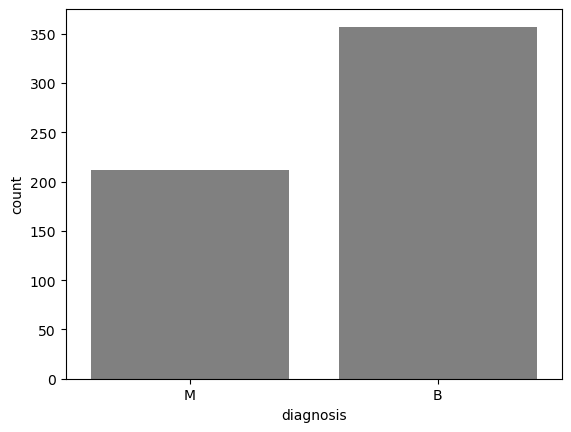

In [29]:
sns.countplot(x='diagnosis',data=dataset,color='gray')

In [30]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0,'M':1})

In [31]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

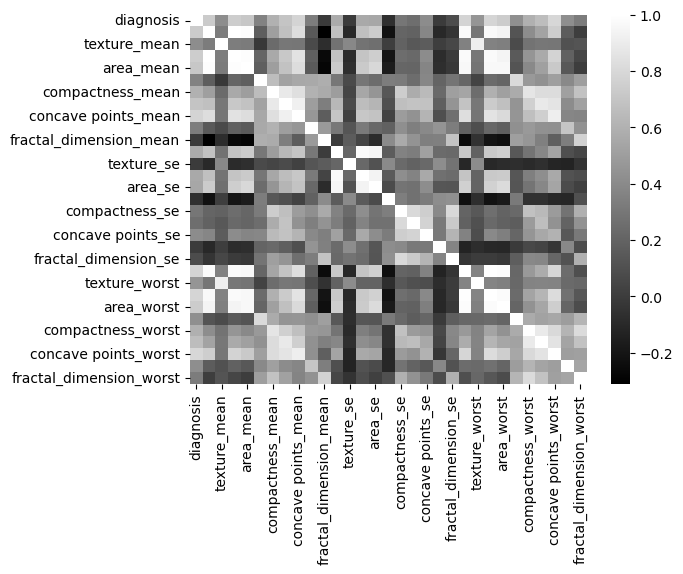

In [32]:
sns.heatmap(dataset.corr(),cmap='gray')

In [33]:
X = dataset.iloc[:,1:].values
y =dataset.iloc[:,0].values

Data Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [36]:
X_train.shape

(455, 30)

In [37]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1])

## Creando el modelo

En este punto, construiremos tres capas. La primera capa tiene “30” neuronas; la segunda capa tiene “15” neuronas; la última capa tiene una sola neurona con función de activación sigmoidea, ya que es un problema de clasificación binaria. En el medio, hemos agregado capas de abandono con la probabilidad de abandonar neuronas indicada como "0.5". Mientras compilamos el modelo, utilizamos "binary_crossentropy" como función de pérdida y "rmsprop" como optimizador. Por último, ajustamos el modelo con el objeto de devolución de llamada de parada anticipada, lo que evitará que el modelo se sobreajuste.

In [38]:
#!pip install tensorflow

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

#
model = Sequential()
model.add(Dense(units=30,activation='relu')) #Capa de entrada

model.add(Dense(units=15,activation='relu')) #Capa oculta

model.add(Dense(units=1,activation='sigmoid')) #Capa de salida

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(x=X_train,
y=y_train,
epochs=400,
validation_data=(X_test, y_test), verbose=1
)

Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6574 - loss: 5.0010 - val_accuracy: 0.7807 - val_loss: 0.6255
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7764 - loss: 1.0312 - val_accuracy: 0.8246 - val_loss: 1.1821
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.6848 - val_accuracy: 0.8772 - val_loss: 0.6496
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.7763 - val_accuracy: 0.5877 - val_loss: 1.3785
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7133 - loss: 1.4657 - val_accuracy: 0.8333 - val_loss: 1.0198
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 1.2590 - val_accuracy: 0.7456 - val_loss: 2.2382
Epoch 7/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.8294 - val_accuracy: 0.4386 - val_loss: 2.6748
Epoch 8/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7774 - loss: 0.9231 - val_accuracy: 0.9035 - v

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9093 - loss: 0.4539 - val_accuracy: 0.5000 - val_loss: 2.4169
Epoch 52/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8095 - loss: 0.9927 - val_accuracy: 0.6404 - val_loss: 1.3806
Epoch 53/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8635 - loss: 0.4652 - val_accuracy: 0.7544 - val_loss: 0.7610
Epoch 54/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8673 - loss: 0.5088 - val_accuracy: 0.9123 - val_loss: 0.3001
Epoch 55/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8946 - loss: 0.4843 - val_accuracy: 0.8772 - val_loss: 0.6021
Epoch 56/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8761 - loss: 0.4673 - val_accuracy: 0.9211 - val_loss: 0.4042
Epoch 57/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8643 - loss: 0.6032 - val_accuracy: 0.8860 - val_loss: 0.3375
Epoch 58/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8886 - loss: 0.4243 - val_accuracy: 0.8596 - 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.2177 - val_accuracy: 0.8947 - val_loss: 0.3256
Epoch 102/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.5054 - val_accuracy: 0.8333 - val_loss: 0.4450
Epoch 103/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8828 - loss: 0.4705 - val_accuracy: 0.9035 - val_loss: 0.2969
Epoch 104/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8919 - loss: 0.3354 - val_accuracy: 0.5702 - val_loss: 1.4954
Epoch 105/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8313 - loss: 0.7278 - val_accuracy: 0.8860 - val_loss: 0.5456
Epoch 106/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.6919 - val_accuracy: 0.9123 - val_loss: 0.2230
Epoch 107/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8914 - loss: 0.3399 - val_accuracy: 0.5877 - val_loss: 1.4763
Epoch 108/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.4894 - val_accuracy: 0.9298 -

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9287 - loss: 0.2500 - val_accuracy: 0.9123 - val_loss: 0.2666
Epoch 152/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9058 - loss: 0.2124 - val_accuracy: 0.9035 - val_loss: 0.2662
Epoch 153/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9135 - loss: 0.2457 - val_accuracy: 0.8509 - val_loss: 0.3912
Epoch 154/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9182 - loss: 0.2048 - val_accuracy: 0.9211 - val_loss: 0.1682
Epoch 155/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.9236 - loss: 0.2141 - val_accuracy: 0.9035 - val_loss: 0.3038
Epoch 156/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8900 - loss: 0.3324 - val_accuracy: 0.5351 - val_loss: 1.6208
Epoch 157/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 0.5193 - val_accuracy: 0.9123 - val_loss: 0.1747
Epoch 158/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9304 - loss: 0.1765 - val_accuracy: 0.8158

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9443 - loss: 0.2068 - val_accuracy: 0.9298 - val_loss: 0.2332
Epoch 202/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1519 - val_accuracy: 0.9298 - val_loss: 0.1981
Epoch 203/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.2095 - val_accuracy: 0.9474 - val_loss: 0.1993
Epoch 204/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9284 - loss: 0.2185 - val_accuracy: 0.9211 - val_loss: 0.2988
Epoch 205/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9242 - loss: 0.2234 - val_accuracy: 0.7632 - val_loss: 0.5185
Epoch 206/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8984 - loss: 0.2938 - val_accuracy: 0.9035 - val_loss: 0.2857
Epoch 207/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9065 - loss: 0.3371 - val_accuracy: 0.8772 - val_loss: 0.4513
Epoch 208/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.3374 - val_accuracy: 0.9211 -

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2434 - val_accuracy: 0.9123 - val_loss: 0.1442
Epoch 252/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9278 - loss: 0.1903 - val_accuracy: 0.9211 - val_loss: 0.1688
Epoch 253/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9425 - loss: 0.1721 - val_accuracy: 0.9298 - val_loss: 0.2337
Epoch 254/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9371 - loss: 0.1784 - val_accuracy: 0.8509 - val_loss: 0.5771
Epoch 255/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.9324 - loss: 0.1938 - val_accuracy: 0.9211 - val_loss: 0.2270
Epoch 256/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9224 - loss: 0.2004 - val_accuracy: 0.9298 - val_loss: 0.1854
Epoch 257/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9499 - loss: 0.1645 - val_accuracy: 0.9211 - val_loss: 0.1468
Epoch 258/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9329 - loss: 0.1729 - val_accuracy

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9508 - loss: 0.1455 - val_accuracy: 0.9123 - val_loss: 0.1481
Epoch 302/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9240 - loss: 0.1886 - val_accuracy: 0.8684 - val_loss: 0.4157
Epoch 303/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9372 - loss: 0.1752 - val_accuracy: 0.9386 - val_loss: 0.1765
Epoch 304/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9495 - loss: 0.1213 - val_accuracy: 0.9386 - val_loss: 0.1786
Epoch 305/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.9558 - loss: 0.1232 - val_accuracy: 0.9298 - val_loss: 0.1389
Epoch 306/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9379 - loss: 0.1512 - val_accuracy: 0.9298 - val_loss: 0.1643
Epoch 307/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.1402 - val_accuracy: 0.8509 - val_loss: 0.6138
Epoch 308/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.2255 - val_accura

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9579 - loss: 0.1125 - val_accuracy: 0.8947 - val_loss: 0.3589
Epoch 352/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9381 - loss: 0.1577 - val_accuracy: 0.9123 - val_loss: 0.2732
Epoch 353/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9244 - loss: 0.2142 - val_accuracy: 0.9298 - val_loss: 0.1629
Epoch 354/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9604 - loss: 0.1023 - val_accuracy: 0.9211 - val_loss: 0.1337
Epoch 355/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9137 - loss: 0.1860 - val_accuracy: 0.9474 - val_loss: 0.1855
Epoch 356/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9433 - loss: 0.1435 - val_accuracy: 0.8596 - val_loss: 0.6011
Epoch 357/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9286 - loss: 0.2053 - val_accuracy: 0.9386 - val_loss: 0.1389
Epoch 358/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9248 - loss: 0.1829 - val_accuracy: 0.6053 -

Sobreajuste

El parámetro de rendimiento del modelo entrenado se puede encontrar en el atributo "history.history" del objeto secuencial. Contiene pérdidas y precisión, ya que pasamos la "accuracy" como matriz.

Text(0.5, 0, 'Epoch')

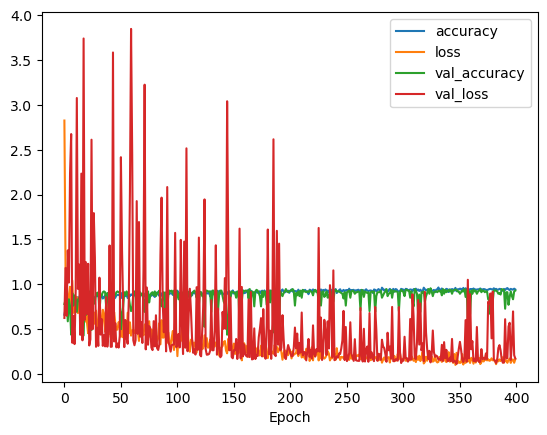

In [41]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_xlabel('Epoch')

Abandono y paro anticipado

Los dos métodos comunes utilizados para reducir el sobreajuste son:
1. Agregar capas de abandono al modelo. Las neuronas se seleccionan aleatoriamente en cada época y se ignoran o se eliminan. De esta forma, cada neurona se vuelve más independiente. Los usuarios pueden especificar la cantidad de neuronas que se eliminarán durante una época.
2. Detención anticipada. Se puede detener el proceso de capacitación a medida que se sobreajusta gradualmente el modelo, mediante el  seguimiento del aumento en la pérdida de validación.

In [42]:
!pip install tensorflow

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

#
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

La capa de abandono se introduce entre las capas de neuronas densamente conectadas. Las capas de abandono toman un valor entre "0" y "1", que denota la fracción de neuronas que los usuarios han optado por abandonar en cada época.

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train,
          y=y_train,
          epochs=400,
          batch_size= 64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5238 - loss: 121.4797 - val_accuracy: 0.6228 - val_loss: 23.8793
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5020 - loss: 108.6203 - val_accuracy: 0.6316 - val_loss: 13.5817
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5185 - loss: 93.2857 - val_accuracy: 0.6316 - val_loss: 6.3741
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4786 - loss: 102.0376 - val_accuracy: 0.6316 - val_loss: 5.2779
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4841 - loss: 88.7220 - val_accuracy: 0.6316 - val_loss: 4.7118
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4996 - loss: 83.2305 - val_accuracy: 0.6579 - val_loss: 1.5312
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5006 - loss: 69.1113 - val_accuracy: 0.5175 - val_loss: 1.3519
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5081 - loss: 62.7338 - val_accuracy: 0.3947 - val_

Text(0.5, 0, 'Epoch')

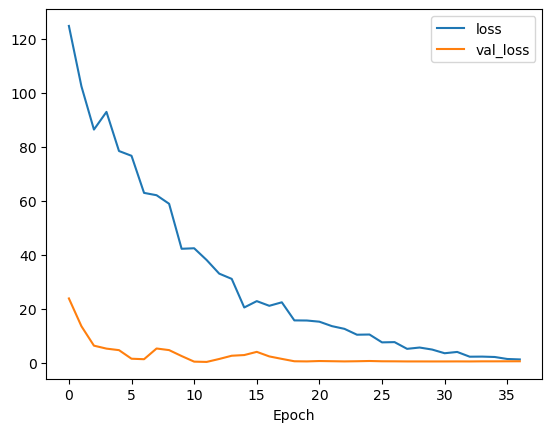

In [45]:
model_loss = pd.DataFrame(model.history.history)
ax = model_loss[['loss','val_loss']].plot()
ax.set_xlabel('Epoch')

In [46]:
#predictions = model.predict_classes(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[71  0]
 [41  2]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        71
           1       1.00      0.05      0.09        43

    accuracy                           0.64       114
   macro avg       0.82      0.52      0.43       114
weighted avg       0.77      0.64      0.52       114

